In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
#read dataset 
dataset = pd.read_csv('Coursework_1_data(1).csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,17].values

# Data Exploration

In [3]:
#describe
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
#creating new DF without the categorical features 
ll=['Month','VisitorType','Weekend','Revenue']
new_ds=dataset
for x in ll:
    new_ds= new_ds[new_ds.columns.difference([x])]

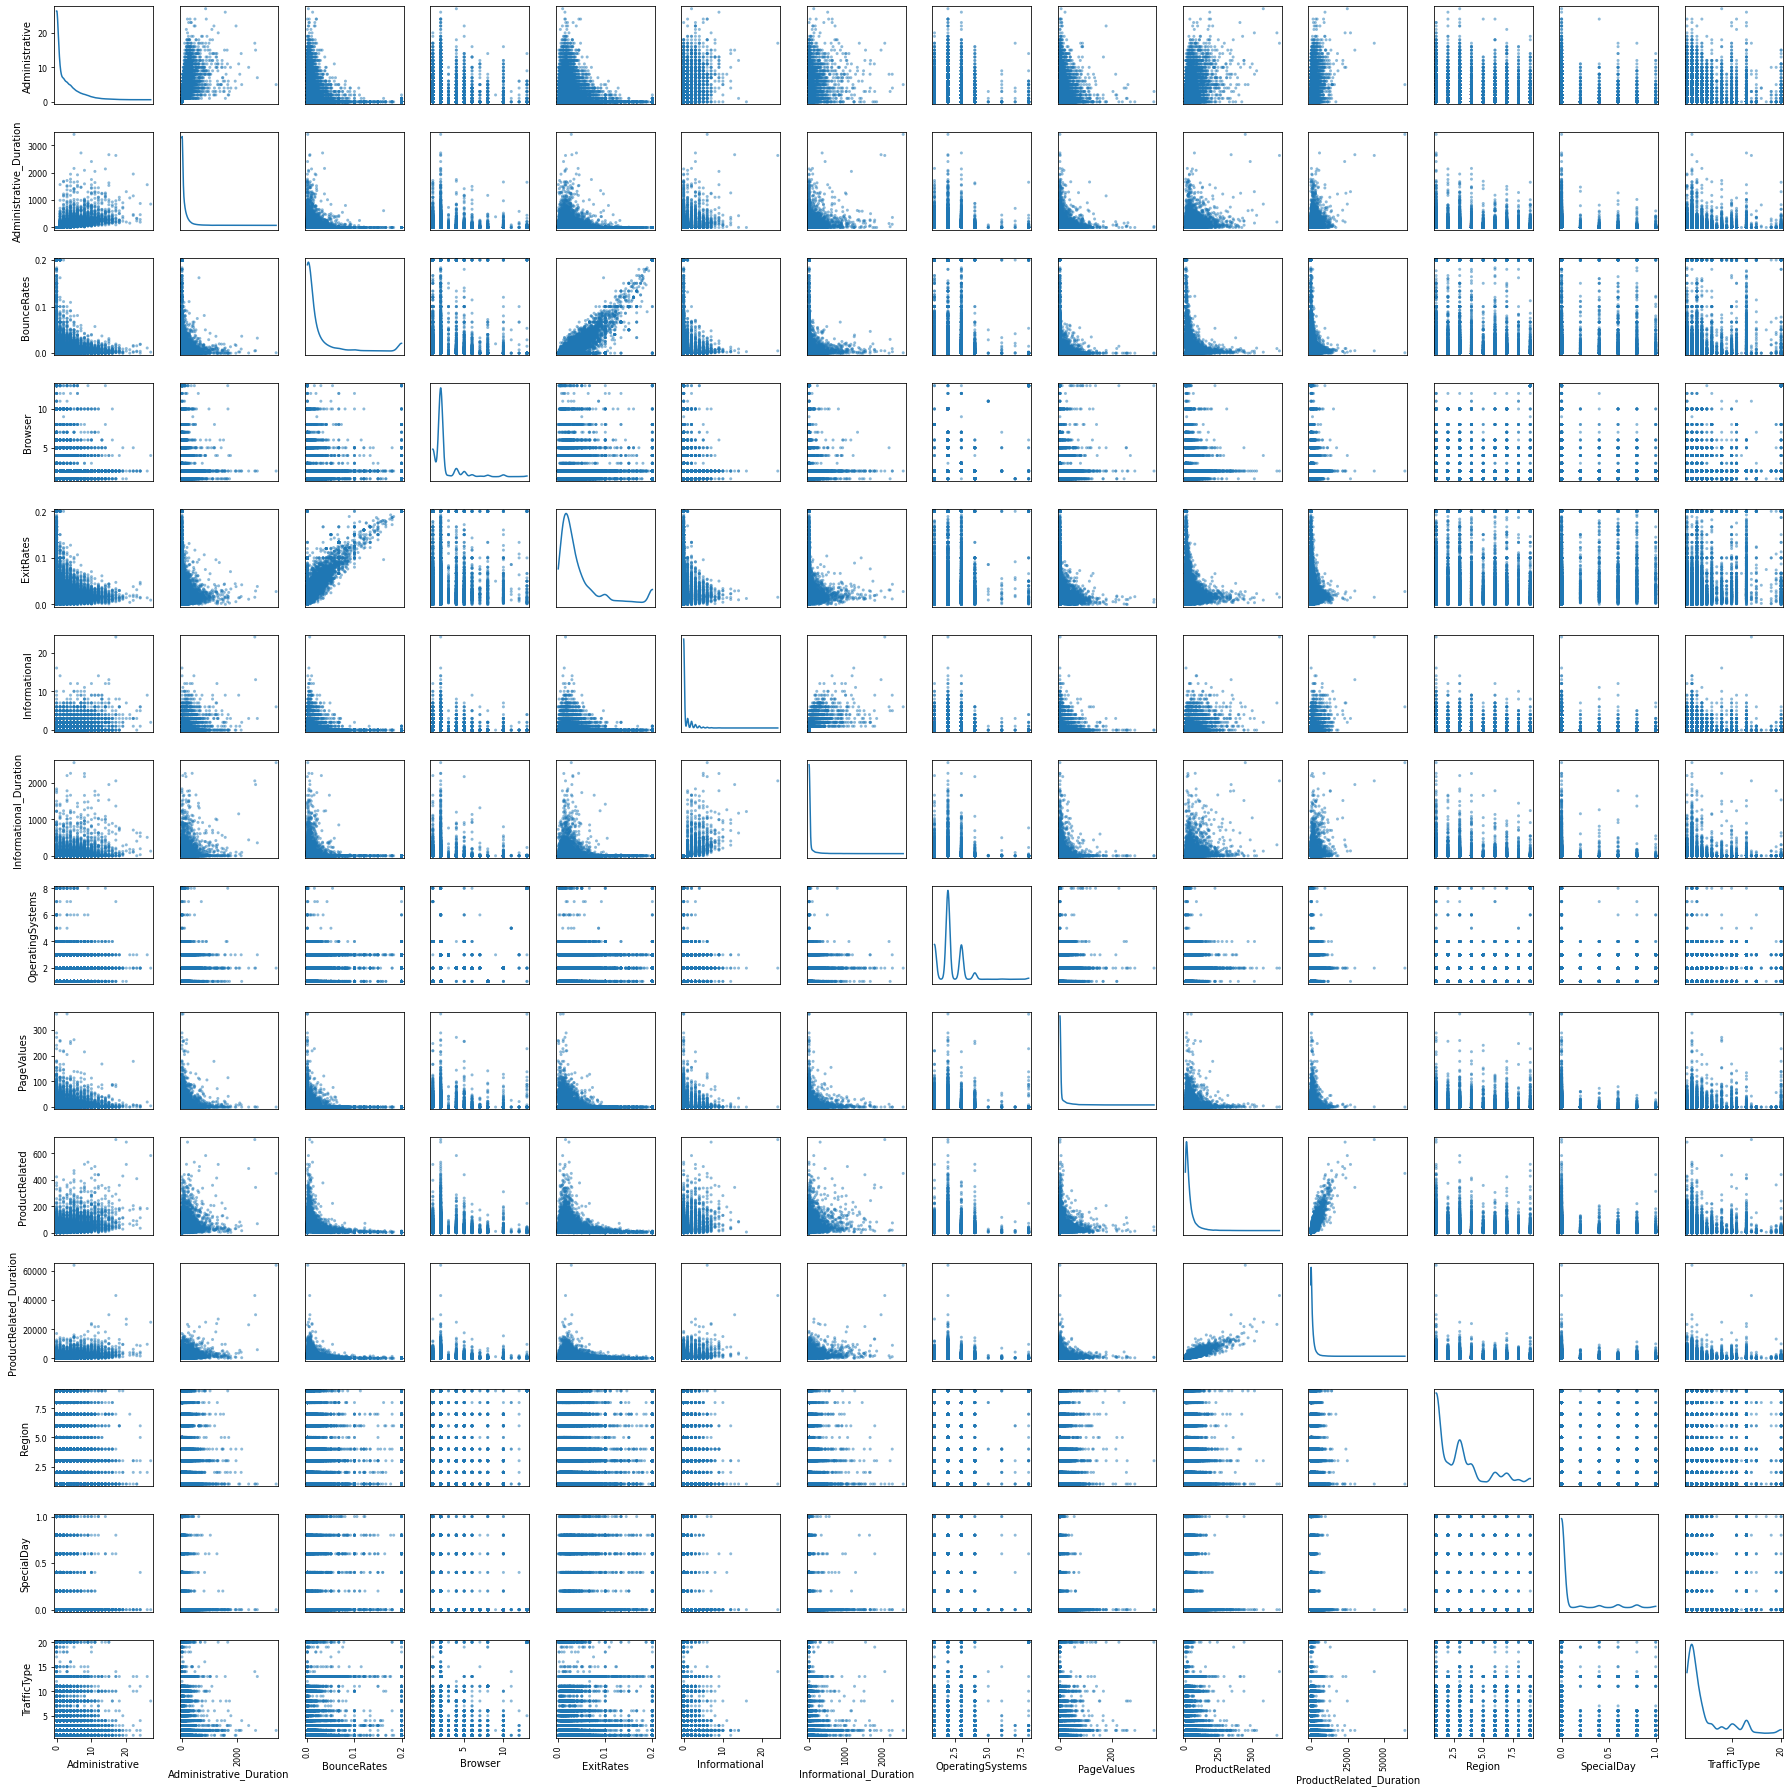

In [5]:
#scatter plots for correlations for each variable
pd.plotting.scatter_matrix(new_ds.loc[:, :], diagonal="kde",figsize=(25,25))
plt.tight_layout()
plt.show()

In [6]:
#most highly correlated
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(new_ds,10)

,FirstVariable,SecondVariable,Correlation
0,BounceRates,ExitRates,0.913004
1,ProductRelated,ProductRelated_Duration,0.860927
2,Informational,Informational_Duration,0.618955
3,Administrative,Administrative_Duration,0.601583
4,Administrative,ProductRelated,0.431119
5,Informational,ProductRelated_Duration,0.387505
6,Administrative,Informational,0.376850
7,Informational,ProductRelated,0.374164
8,Administrative,ProductRelated_Duration,0.373939
9,Administrative_Duration,ProductRelated_Duration,0.355422


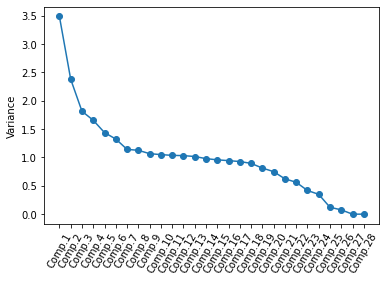

In [8]:
X1 = dataset.iloc[:,0:17]
X1 = pd.get_dummies(X1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
# Component importance
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, X1)

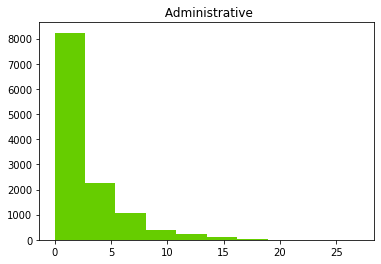

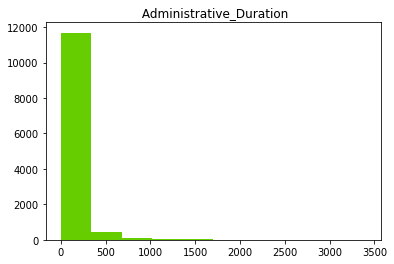

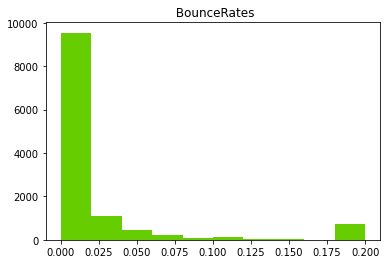

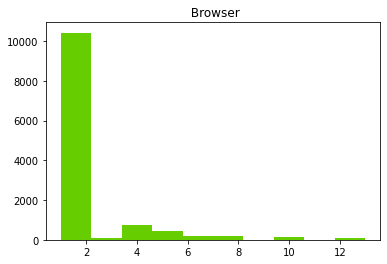

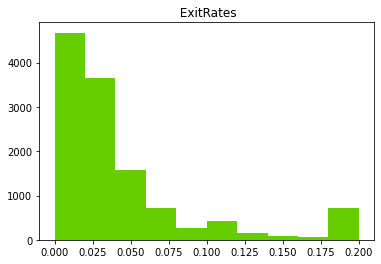

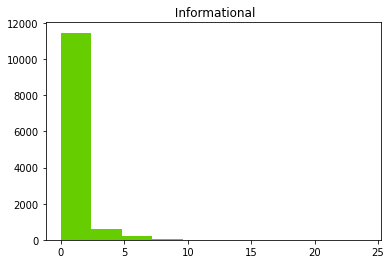

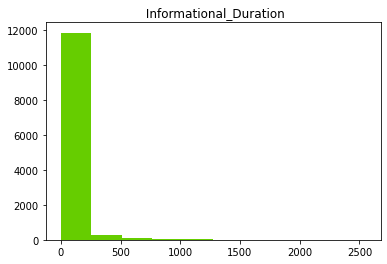

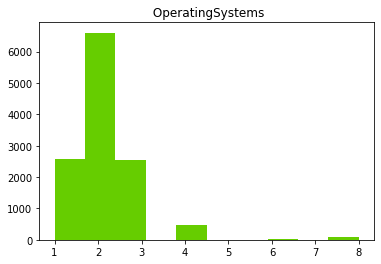

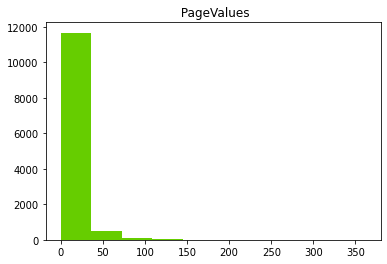

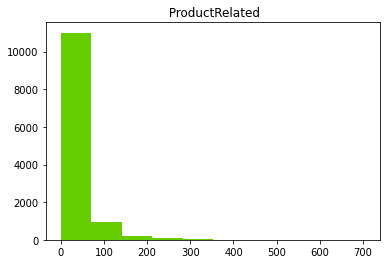

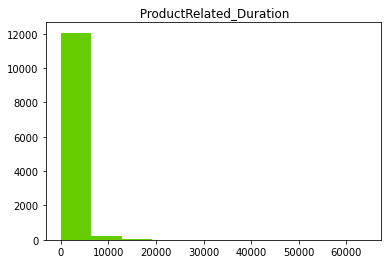

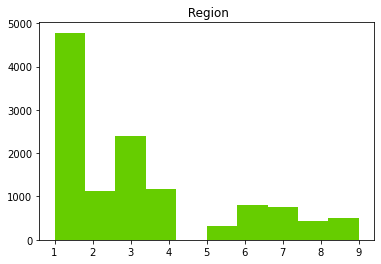

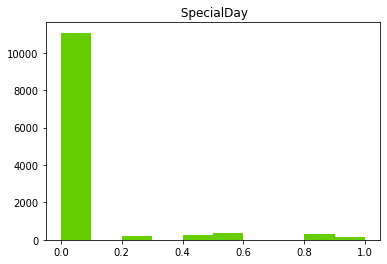

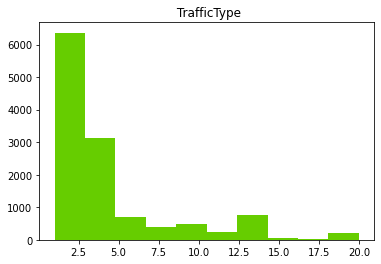

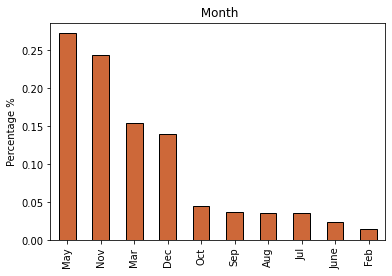

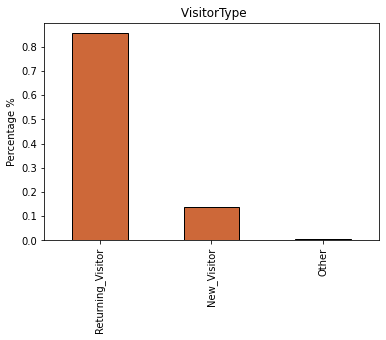

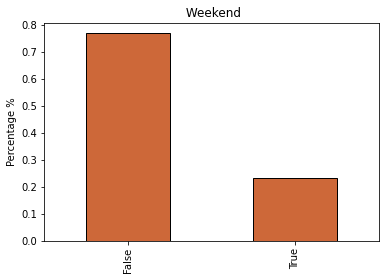

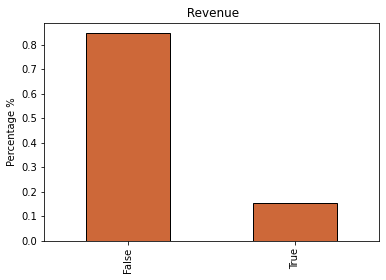

In [9]:
#histograms for visualization
for x in new_ds:
    plt.hist(new_ds[x],color='#66CD00')
    #plt.hist(dataset[x])
    plt.title(((' {}'.format(x))))
    plt.show()
    
#categorical features' histograms to see values
for x in ll:
    dataset[x].value_counts(normalize=True).plot(kind='bar',color='#CD6839',edgecolor='black')
    plt.title(((' {}'.format(x))))
    plt.ylabel('Percentage %')
    plt.show()

No handles with labels found to put in legend.


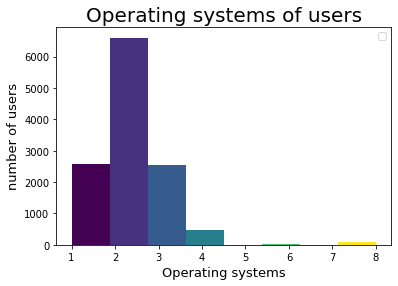

No handles with labels found to put in legend.


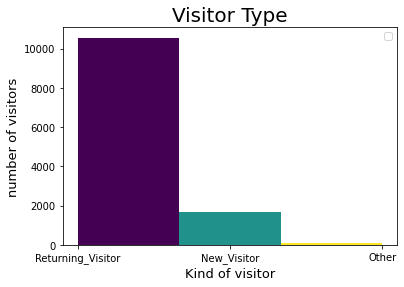

In [10]:
#graphs for opsystem and visitor type w/ color
nbins=8
colors = plt.get_cmap('viridis')(np.linspace(0, 1, nbins))
n, bins, patches = plt.hist(new_ds['OperatingSystems'], bins=nbins)
# apply the same color for each class to match the map
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.xlabel('Operating systems',fontsize=13)
plt.ylabel('number of users',fontsize=13)
plt.legend()
plt.title('Operating systems of users', fontsize=20)   
plt.show()

nbins=3
colors = plt.get_cmap('viridis')(np.linspace(0, 1, nbins))
n, bins, patches = plt.hist(dataset['VisitorType'], bins=nbins)
# apply the same color for each class to match the map
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.xlabel('Kind of visitor',fontsize=13)
plt.ylabel('number of visitors',fontsize=13)
plt.legend()
plt.title('Visitor Type', fontsize=20)   
plt.show()

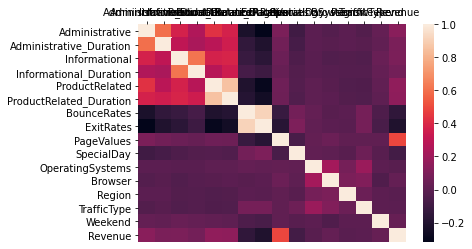

In [11]:
#correlation heatmap
"""
shows the correlation coefficient for each pair of variables.
"""
corrmat = dataset.corr()
corrmat
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


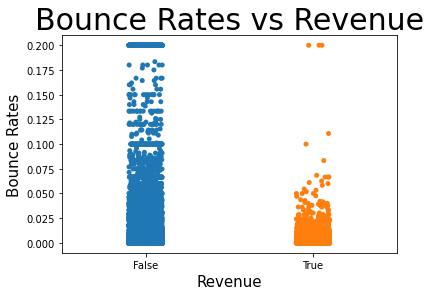

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


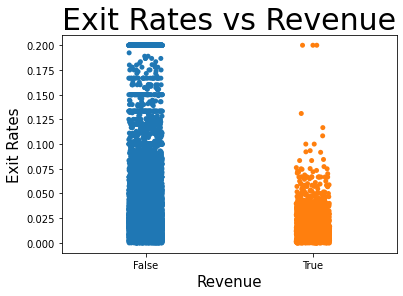

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


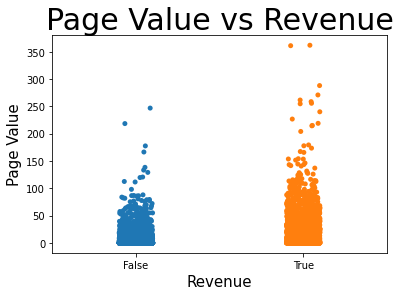

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


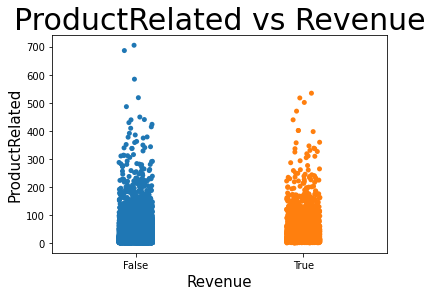

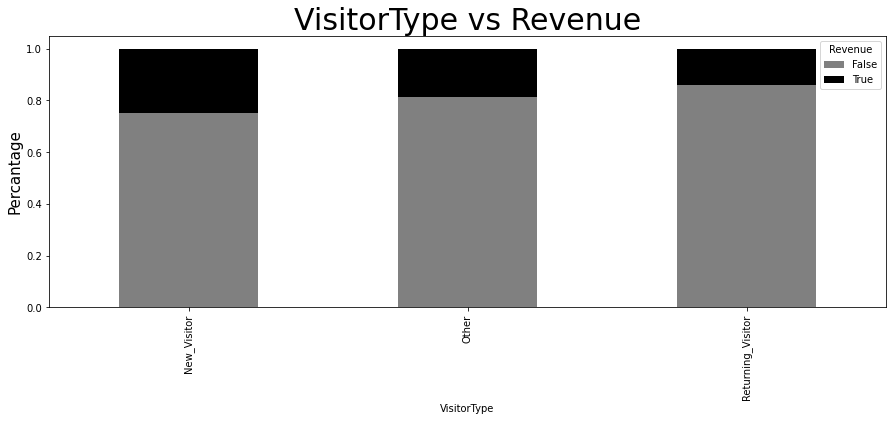

In [12]:
#weekend-revenue
#negative correlation
sns.stripplot(dataset['Revenue'], dataset['BounceRates'])
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Bounce Rates', fontsize = 15)
plt.show()

sns.stripplot(dataset['Revenue'], dataset['ExitRates'])
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Exit Rates', fontsize = 15)
plt.show()
#page value revenue
#positive correlation
sns.stripplot(dataset['Revenue'], dataset['PageValues'])
plt.title('Page Value vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Page Value', fontsize = 15)
plt.show()
#productRelated-revenue, productRelated_duration revenue
#neutral corelation
sns.stripplot(dataset['Revenue'], dataset['ProductRelated'])
plt.title('ProductRelated vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('ProductRelated', fontsize = 15)
plt.show()
#visitorType-revenue
df = pd.crosstab(dataset['VisitorType'], dataset['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['gray', 'black'])
plt.title('VisitorType vs Revenue', fontsize = 30)
plt.ylabel('Percantage', fontsize = 15)
plt.show()

# Clustering

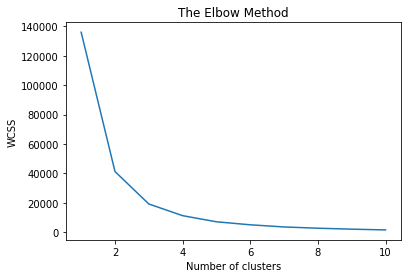

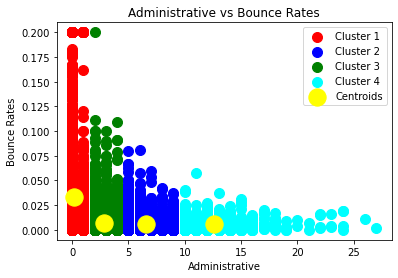

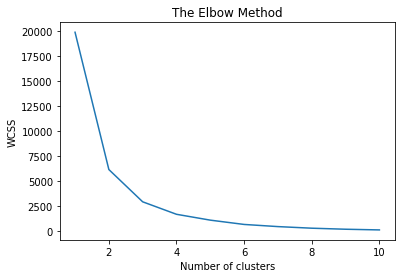

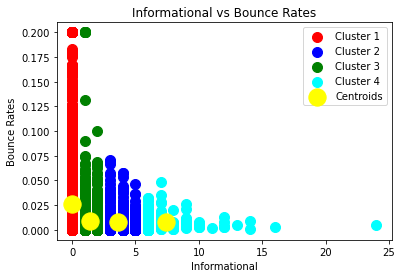

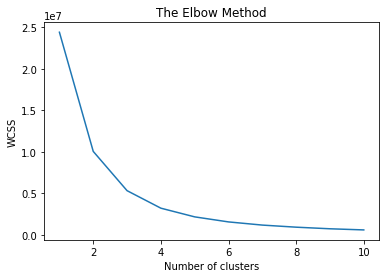

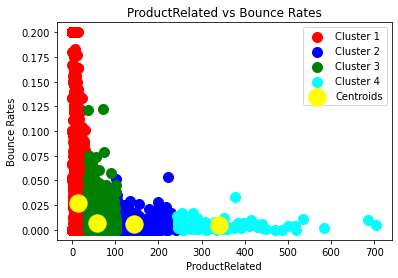

In [13]:
#clustering ProductRelated,Informational&Administrative-BounceRates
tt=[0,2,4]
for tt in tt:
    X1 = dataset.iloc[:, [tt,6]].values
    
    from sklearn.cluster import KMeans
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X1)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X1)
    
    ## Visualising the clusters
    plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('{} vs {}'.format(dataset.columns.values[tt],'Bounce Rates'))
    plt.xlabel('{}'.format(dataset.columns.values[tt]))
    plt.ylabel('Bounce Rates')
    plt.legend()
    plt.show()

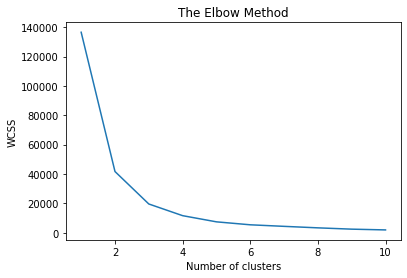

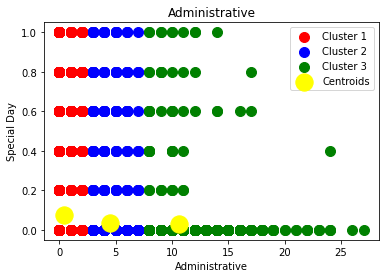

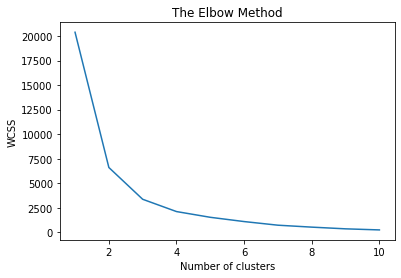

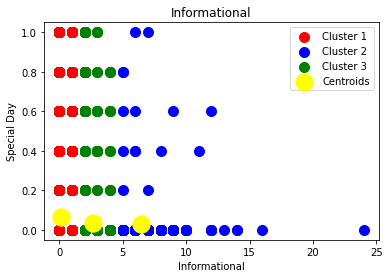

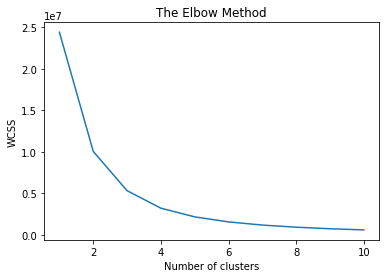

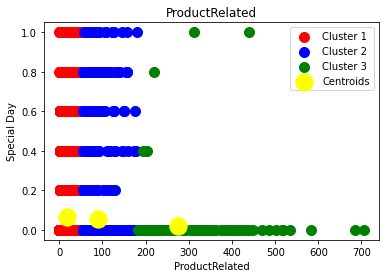

In [14]:
#clustering ProductRelated,Informational&Administrative-SpecialDay
tt=[0,2,4]
for tt in tt:
    X1 = dataset.iloc[:, [tt,9]].values
    
    #from sklearn.cluster import KMeans
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X1)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X1)
    
    ## Visualising the clusters
    plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('{}'.format(dataset.columns.values[tt]))
    plt.xlabel('{}'.format(dataset.columns.values[tt]))
    plt.ylabel('Special Day')
    plt.legend()
    plt.show()

# Data Preprocessing

In [15]:
#checking if there is null in dataset
np.where(pd.isnull(dataset))

#chechking if there are empty spaces in dataset
if dataset.empty == True:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')

DataFrame is not empty


In [16]:
#Encoding Categorical Features
#independent variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#onehotencoder is used in order to identify later each category
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [10])], remainder='passthrough')
X= np.array(ct.fit_transform(X))
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [24])], remainder='passthrough')
X= np.array(ct.fit_transform(X))

In [17]:
#binary encoding of weekend
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,27]=le.fit_transform(X[:,27])

#binary encoding
le=LabelEncoder()
y=le.fit_transform(y)

In [18]:
#Feature Scaling (needed for some ML models)
#it's done later

#Imbalanced Data
#it is done later

[0.05394631 0.0509966  0.0305696  0.02949337 0.0684151  0.07137458
 0.05377757 0.07483744 0.31814718 0.00500825 0.03195316 0.03260704
 0.04487767 0.0441988  0.01664228 0.00367786 0.00557108 0.00087021
 0.00386783 0.00269278 0.00524155 0.00631707 0.02153373 0.00448566
 0.00457695 0.00751542 0.00052108 0.00628381]


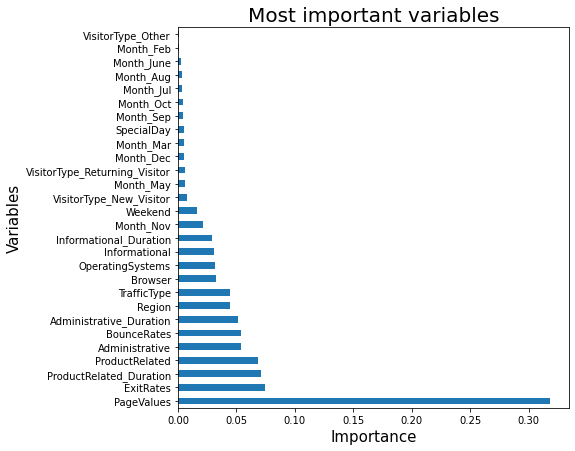

In [19]:
#Data Reduction
'''
With this technique, you can get the feature importance 
of every feature from your dataset 
with the use of feature importance tool of the model.

Feature Importance works by giving a relevancy score to your to every feature of your dataset,
 the higher the score it will give, the higher relevant that feature will be for the training of your model.
'''

y1=dataset.iloc[:,17]
X1 = dataset.iloc[:,0:17]
X1 = pd.get_dummies(X1)
#sc = StandardScaler()
#X1 = sc.fit_transform(X1)

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(28).plot(kind='barh',figsize=(7,7))
plt.title('Most important variables', fontsize=20)
plt.xlabel('Importance',fontsize=15)
plt.ylabel('Variables',fontsize=15)
plt.show()

In [ ]:
"""
below i tried excluding the variables with the lowest importance,
made the CM and the CAP Curve worst than with them.
And because the computation time didnt change much, it is not worth it to remove them (cap curve fell by 5%)
"""

# Model Implementation

In [21]:
#defining function for CAP Curve
def capcurve1(y_values, y_preds_proba,namee):
    """
    takes in the models and creates CAP Curves
    """
    from scipy import integrate
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values[:-1],y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False)#.reset_index('index', drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = np.trunc(num_count * percent)
    
    val_y1 = yy[int(row_index)]
    val_y2 = yy[int(row_index)+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[int(row_index)]
        val_x2 = xx[int(row_index)+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    #ar_label = 'ar value = %s' % ar_value
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label=namee)
    #ax.scatter(xx,yy, color='red')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()

**Function that runs the models**

In [22]:
#function for implementing the models with/ without resampling if you want to see the differences
def alldem(X,y,oversumpling):
    """
    oversumpling=1 for oversampling. or oversampling=0 for the regular training set

    """
    cm1=[]
    evaluation=[]
    clre=[]
    from imblearn.combine import SMOTETomek
    smk = SMOTETomek(random_state=0)
    
    
    from sklearn.metrics import classification_report
    #Decision tree classification
    #X = dataset.iloc[:, :-1].values
    #y = dataset.iloc[:, -1].values
    
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    if oversumpling==1:
        x_res,y_res=smk.fit_sample(X_train,y_train)
    else:
        x_res,y_res= X_train, y_train
    
    # Training the Decision Tree Classification model on the Training set
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm1.append(cm)
    #accuracy score
    accuracy_score(y_test, y_pred)
    evaluation.append(accuracy_score(y_test, y_pred))
    #classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    clre.append(cr)
    
    
    # K-Nearest Neighbors (K-NN)
    
    
    # Training the K-NN model on the Training set
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm1.append(cm)
    #accuracy score
    accuracy_score(y_test, y_pred)
    evaluation.append(accuracy_score(y_test, y_pred))
    #classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    clre.append(cr)
    
    
    
    # Kernel SVM
    
    
    # Training the Kernel SVM model on the Training set
    from sklearn.svm import SVC
    classifier = SVC(C=100, kernel = 'rbf', random_state = 0)
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm1.append(cm)
    #accuracy score
    accuracy_score(y_test, y_pred)
    evaluation.append(accuracy_score(y_test, y_pred))
    #classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    clre.append(cr)
    
    
    
    # Logistic Regression
    
    
    # Training the Logistic Regression model on the Training set
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(C=10,penalty="l2", random_state = 0)
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm1.append(cm)
    #accuracy score
    accuracy_score(y_test, y_pred)
    evaluation.append(accuracy_score(y_test, y_pred))
    #classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    clre.append(cr)
    
    
    
    # Naive Bayes

    
    # Training the Naive Bayes model on the Training set
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm1.append(cm)
    #accuracy score
    accuracy_score(y_test, y_pred)
    evaluation.append(accuracy_score(y_test, y_pred))
    #classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    clre.append(cr)
    
    
    
    
    # Random Forest Classification

    
    # Training the Random Forest Classification model on the Training set
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm1.append(cm)
    #accuracy score
    accuracy_score(y_test, y_pred)
    evaluation.append(accuracy_score(y_test, y_pred))
    #classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    clre.append(cr)
    
    
    
    
    # Support Vector Machine (SVM)
    # Splitting the dataset into the Training set and Test set

    
    # Training the SVM model on the Training set
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0) #probability True
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm1.append(cm)
    #report
    cr = classification_report(y_test, y_pred)
    print(cr)
    #accuracy score derived from confusion matrix
    accuracy_score(y_test, y_pred)
    evaluation.append(accuracy_score(y_test, y_pred))
    #classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    clre.append(cr)

    return clre,evaluation,cm1

**Results**

In [23]:
#RESULTS OF ABOVE functions oversampled training
alll3=alldem(X,y,1)
#below is without oversampling
alll4=alldem(X,y,0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

[[2307  252]
 [ 195  329]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2559
           1       0.57      0.63      0.60       524

    accuracy                           0.86      3083
   macro avg       0.74      0.76      0.75      3083
weighted avg       0.86      0.86      0.86      3083

[[2027  532]
 [ 183  341]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2559
           1       0.39      0.65      0.49       524

    accuracy                           0.77      3083
   macro avg       0.65      0.72      0.67      3083
weighted avg       0.83      0.77      0.79      3083

[[2292  267]
 [ 202  322]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2559
           1       0.55      0.61      0.58       524

    accuracy                           0.85      3083
   macro avg       0.73      0.76      0.74    

**CAP** **CURVE**

In [24]:
### CAP Curve for the resampled data
def getthecurve(X,y,oversumpling):
    """
    oversumpling=1 for oversampling. or oversampling=0 for the regular training set

    """
    
    from imblearn.combine import SMOTETomek
    smk = SMOTETomek(random_state=0)
    ######CAP Curve for the resampled data
    #random forest
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    if oversumpling==1:
        x_res,y_res=smk.fit_sample(X_train,y_train)
    else:
        x_res,y_res= X_train, y_train

    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
    classifier.fit(x_res, y_res)
    
    # Making the graph
    # Making cap curve
    y_pred = classifier.predict(X_test)
    y_preds_proba = y_pred
    namee='RandomForestClassifier'
    capcurve1(y_test, y_preds_proba[:-1],namee)
    
    
    # Logistic Regression
    # Training the Logistic Regression model on the Training set
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(C=10,solver='lbfgs',random_state = 0)
    classifier.fit(x_res, y_res)
    
    #Making the CAP curve
    y_pred = classifier.predict(X_test)
    y_preds_proba = y_pred
    namee='Logistic Regression'
    capcurve1(y_test, y_preds_proba[:-1],namee)

    #Kernel SVM CAP curve
    # Training the Kernel SVM model on the Training set
    from sklearn.svm import SVC
    classifier = SVC(C=100,kernel = 'rbf', random_state = 0 )
    classifier.fit(x_res, y_res)
    
    # Making the Confusion Matrix
    # Making cap curve
    y_pred = classifier.predict(X_test)
    y_preds_proba = y_pred
    namee='Kernel SVM'
    capcurve1(y_test, y_preds_proba[:-1],namee)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


      0  1
1541  0  1
1409  0  1
1328  1  1
1339  0  1
1348  0  1
1350  1  1
1351  1  1
1352  0  1
1356  0  1
1363  1  1
1368  0  1
1382  1  1
1394  0  1
1396  0  1
1400  1  1
1410  1  1
1479  0  1
1424  0  1
1426  0  1
1432  0  1


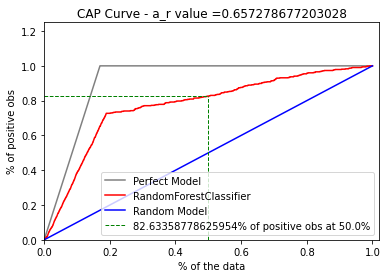

      0  1
1541  0  1
1437  1  1
1428  0  1
1426  0  1
1425  0  1
1424  0  1
1420  0  1
1410  1  1
1409  0  1
1405  0  1
1400  1  1
1399  0  1
1396  0  1
1394  0  1
1382  1  1
1380  0  1
1378  0  1
1435  1  1
1447  0  1
1210  0  1


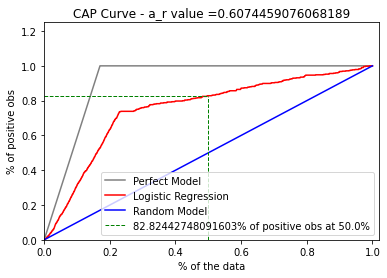

      0  1
0     0  1
1326  0  1
1255  1  1
1263  1  1
1266  1  1
1282  1  1
1288  0  1
1292  1  1
1305  0  1
1308  1  1
1309  1  1
1318  0  1
1321  1  1
1322  1  1
1325  0  1
1328  1  1
1435  1  1
1343  0  1
1345  0  1
1350  1  1


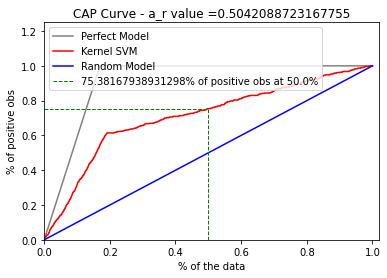

In [25]:
#cap curve graphs from above function
#put oversumpling 0 for no resampling and 1 for resampling
getthecurve(X,y,1)

# **Hyperparameter tunining**

In [26]:
#####checking the hyperparameters for forest
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
    
    #random forest
    # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
x_res,y_res=smk.fit_sample(X_train,y_train)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 0)

from sklearn.model_selection import GridSearchCV

#parameters and their corresponding values for forest
grid_param = {'n_estimators':[10,100,400,1000], 'criterion':['gini','entropy']}

gd_sr= GridSearchCV(estimator= classifier, param_grid=grid_param, scoring= 'recall', cv=2, n_jobs=-1)
gd_sr.fit(x_res,y_res)
best_parameters = gd_sr.best_params_
print(best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'criterion': 'entropy', 'n_estimators': 1000}


In [ ]:
#checking hyperparameters for Kernel SVM
from sklearn.svm import SVC
classifier = SVC(C=100 ,gamma='scale', kernel = 'rbf', random_state = 0)
grid_param2= {'C':[1, 10, 100], 'gamma':[0.001,1,5,10,'scale']}

gd_sr= GridSearchCV(estimator= classifier, param_grid=grid_param2, scoring= 'recall', n_jobs=-1)
gd_sr.fit(x_res,y_res)
best_parameters = gd_sr.best_params_
print(best_parameters)

In [28]:
#checking hyperparameters for Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1,solver= 'lbfgs',random_state = 0, penalty="l2")
grid_param3= {'C':[1, 10, 100], 'solver':['lbfgs','sag'], "penalty":["l1","l2"]}

gd_sr= GridSearchCV(estimator= classifier, param_grid=grid_param3, scoring= 'recall', cv=2, n_jobs=-1)
gd_sr.fit(x_res,y_res)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


**Voting Ensemble**

In [ ]:
# Tried Voting Ensemble for Classification, not very exciting results
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
kfold = model_selection.KFold(n_splits=10, random_state=2)

estimators = []
model1 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
estimators.append(('Random Forest', model1))
model2 = classifier = SVC(C=100 ,gamma='scale', kernel = 'rbf', random_state = 0)
estimators.append(('Kernel SVM', model2))
model3 = LogisticRegression(C=1,solver= 'lbfgs',random_state = 0, penalty="l2")
estimators.append(('Logistic Regression', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
x_res,y_res=smk.fit_sample(X_train,y_train)
results = model_selection.cross_val_score(ensemble,x_res ,y_res , cv=kfold)
ensemble.fit(x_res, y_res)
preds = ensemble.predict(X_test)
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

precision = precision_score(y_test, preds)
f1 = f1_score(y_test, preds)
recall=recall_score(y_test, preds)
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, preds)
print(cm)
print(recall)
